In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# data_path
dir_data = './data/TW'
f_app_train = os.path.join(dir_data, 'fakedata.CSV')
app_train = pd.read_csv(f_app_train)

In [2]:
app_train.head(10)

,member_id,postal_cd,date_cd,department,index,prod_id,goods,price,MSRP
0,abc123,813,day10,3C,藍芽/耳機,11111111,Apple AirPods Pro (MWP22TA/A),7359,8000
1,abc123,813,day11,3C,運動攝影機,11111112,GoPro HERO 8,15000,16000
2,abc123,815,day12,Clothes,球鞋,11111113,Nike Jordan,6800,7500
3,abc123,816,day13,3C,手機,11111114,iPhone 11,22900,24000
4,abc127,817,day14,Clothes,服飾,11111115,Edwin jeans,1600,2000
5,abc128,818,day15,Clothes,服飾,11111116,Levis T-short,990,1200
6,abc128,818,day16,3C,電腦,11111117,ASUS VivoBook,21500,26900
7,abc128,820,day17,Food,寵物,11111118,Cat Tree,1690,1990
8,abc131,821,day18,Game,遊戲,11111119,Switch,9900,11000
9,abc131,822,day19,Book,書籍,11111120,Too Much and Never Enough,450,500


In [3]:
# calculate discount
df = app_train.copy()
discount = []

for i in df.index:
    discount.append(round(df['price'][i]/df['MSRP'][i], 3) * 100)

df['Discount'] = discount
df.head(10)

,member_id,postal_cd,date_cd,department,index,prod_id,goods,price,MSRP,Discount
0,abc123,813,day10,3C,藍芽/耳機,11111111,Apple AirPods Pro (MWP22TA/A),7359,8000,92.0
1,abc123,813,day11,3C,運動攝影機,11111112,GoPro HERO 8,15000,16000,93.8
2,abc123,815,day12,Clothes,球鞋,11111113,Nike Jordan,6800,7500,90.7
3,abc123,816,day13,3C,手機,11111114,iPhone 11,22900,24000,95.4
4,abc127,817,day14,Clothes,服飾,11111115,Edwin jeans,1600,2000,80.0
5,abc128,818,day15,Clothes,服飾,11111116,Levis T-short,990,1200,82.5
6,abc128,818,day16,3C,電腦,11111117,ASUS VivoBook,21500,26900,79.9
7,abc128,820,day17,Food,寵物,11111118,Cat Tree,1690,1990,84.9
8,abc131,821,day18,Game,遊戲,11111119,Switch,9900,11000,90.0
9,abc131,822,day19,Book,書籍,11111120,Too Much and Never Enough,450,500,90.0


In [4]:
# calculate DFM data
df1 = df.groupby('member_id').agg({'Discount': np.mean, 'prod_id': np.size})
df2 = df.groupby('member_id')['price'].sum()

df1['MonetaryValue'] = df2
df3 = df1.rename(columns={'prod_id':'Frequency'})
df3

,Discount,Frequency,MonetaryValue
member_id,,,
abc123,92.975000,4,52059
abc127,80.000000,1,1600
abc128,82.433333,3,24180
abc131,90.000000,2,10350


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\user\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


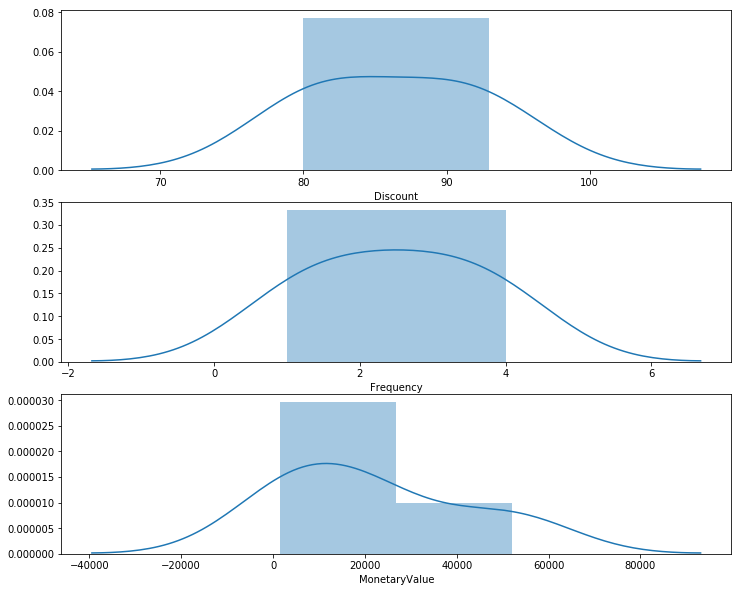

In [5]:
# Plot DFM distributions

plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(df3['Discount'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(df3['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(df3['MonetaryValue'])
# Show the plot
plt.show()

In [6]:
# --Calculate D and F groups--

# Create labels for Recency and Frequency
d_labels = range(4, 0, -1); f_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
d_groups = pd.qcut(df3['Discount'], q=4, labels=d_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(df3['Frequency'], q=4, labels=f_labels)
# Create new columns R and F 
df3 = df3.assign(D = d_groups.values, F = f_groups.values)

# Create labels for MonetaryValue

m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(df3['MonetaryValue'], q=4, labels=m_labels)
# Create new column M
df3 = df3.assign(M = m_groups.values)

# Concat DFM quartile values to create RFM Segments

def join_rfm(x): return str(x['D']) + str(x['F']) + str(x['M'])
df3['DFM_Segment_Concat'] = df3.apply(join_rfm, axis=1)
dfm = df3
dfm.head()

,Discount,Frequency,MonetaryValue,D,F,M,DFM_Segment_Concat
member_id,,,,,,,
abc123,92.975000,4,52059,1,4,4,144
abc127,80.000000,1,1600,4,1,1,411
abc128,82.433333,3,24180,3,3,3,333
abc131,90.000000,2,10350,2,2,2,222


In [7]:
# Count num of unique segments
dfm_count_unique = dfm.groupby('DFM_Segment_Concat')['DFM_Segment_Concat'].nunique()
print(dfm_count_unique.sum())

4


In [8]:
# Calculate DFM_Score
dfm['DFM_Score'] = dfm[['D','F','M']].sum(axis=1)
print(dfm['DFM_Score'].head())

member_id
abc123    9.0
abc127    6.0
abc128    9.0
abc131    6.0
Name: DFM_Score, dtype: float64


In [9]:
# Define rfm_level function
def dfm_level(df):
    if df['DFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['DFM_Score'] >= 8) and (df['DFM_Score'] < 9)):
        return 'Champions'
    elif ((df['DFM_Score'] >= 7) and (df['DFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['DFM_Score'] >= 6) and (df['DFM_Score'] < 7)):
        return 'Potential'
    elif ((df['DFM_Score'] >= 5) and (df['DFM_Score'] < 6)):
        return 'Promising'
    elif ((df['DFM_Score'] >= 4) and (df['DFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
dfm['DFM_Level'] = dfm.apply(dfm_level, axis=1)
# Print the header with top 5 rows to the console
dfm.head()

,Discount,Frequency,MonetaryValue,D,F,M,DFM_Segment_Concat,DFM_Score,DFM_Level
member_id,,,,,,,,,
abc123,92.975000,4,52059,1,4,4,144,9.0,Can't Loose Them
abc127,80.000000,1,1600,4,1,1,411,6.0,Potential
abc128,82.433333,3,24180,3,3,3,333,9.0,Can't Loose Them
abc131,90.000000,2,10350,2,2,2,222,6.0,Potential


In [10]:
# Calculate average values for each DFM_Level, and return a size of each segment 

dfm_level_agg = dfm.groupby('DFM_Level').agg({
    'Discount': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(dfm_level_agg)

                 Discount Frequency MonetaryValue      
                     mean      mean          mean count
DFM_Level                                              
Can't Loose Them     87.7       3.5       38119.5     2
Potential            85.0       1.5        5975.0     2


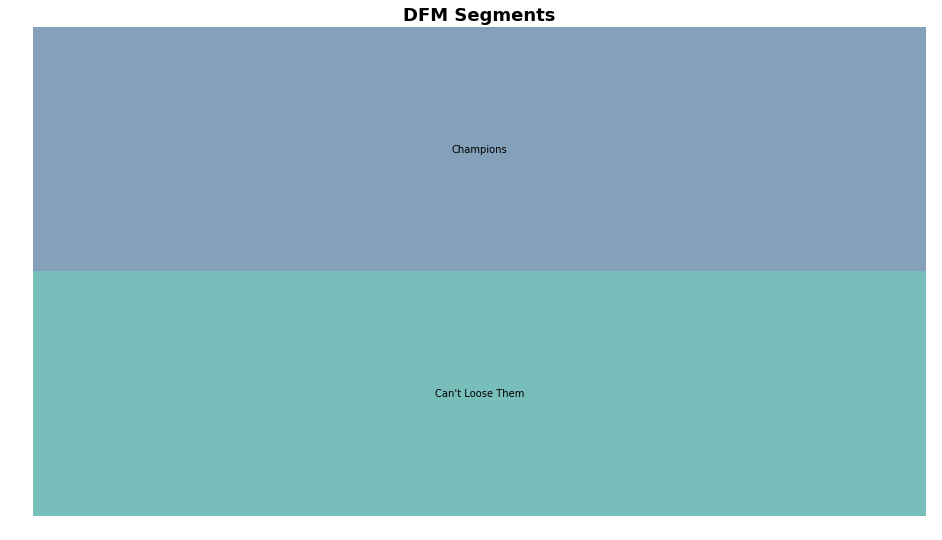

In [11]:
dfm_level_agg.columns = dfm_level_agg.columns.droplevel()
dfm_level_agg.columns = ['DiscountMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=dfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )
plt.title("DFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()